In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [4]:
calls_2018 = pd.read_csv("../data/Calls_2018.csv", low_memory=False)
calls_2019 = pd.read_csv("../data/Calls_2019.csv", low_memory=False)
calls_2020 = pd.read_csv("../data/Calls_2020.csv", low_memory=False)
calls_2021 = pd.read_csv("../data/Calls_2021.csv", low_memory=False)

In [5]:
combined_calls_data = pd.concat([
    calls_2018,
    calls_2019,
    calls_2020,
    calls_2021
], ignore_index=True)

In [7]:
# Calls_2020 ， Call_Received， datetime 
calls_2020['Call_Received'] = pd.to_datetime(
    calls_2020['Call_Received'],
    format="%m/%d/%Y %H:%M",  
    errors='coerce'
)

In [8]:
# delete 2022
combined_calls_data['Call_Received'] = pd.to_datetime(combined_calls_data['Call_Received'], errors='coerce')
combined_calls_data= combined_calls_data[combined_calls_data['Call_Received'].dt.year <= 2021]

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\2079704092.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_calls_data['Call_Received'] = pd.to_datetime(combined_calls_data['Call_Received'], errors='coerce')


In [9]:
combined_calls_data.to_csv(
    "../data/combined_calls_data.csv",
    index=False,
    date_format="%Y-%m-%d %H:%M:%S"
)

In [10]:
calls_df = pd.read_csv(
    "../data/combined_calls_data.csv",
    low_memory=False,
    parse_dates=['Call_Received']
)

In [11]:
calls_df['Year'] = calls_df['Call_Received'].dt.year
print(calls_df['Year'].value_counts().sort_index())

Year
2018    999925
2019    828233
2020    691728
2021    530420
Name: count, dtype: int64


In [12]:
print(calls_df['Call_Received'].dtype)
print(calls_df['Call_Received'].head(10))

datetime64[ns]
0   2018-02-13 14:03:46
1   2018-07-11 07:07:27
2   2018-11-08 17:26:30
3   2018-09-10 12:52:48
4   2018-12-19 01:46:17
5   2018-02-28 15:13:36
6   2018-05-13 23:58:41
7   2018-05-23 02:19:25
8   2018-05-26 08:03:49
9   2018-05-26 23:00:25
Name: Call_Received, dtype: datetime64[ns]


In [13]:
import os
print(os.getcwd())


C:\Users\jingl\NSS Analytics DA14\Project\capstones\school capstone\Notebook


In [14]:
crime_df = pd.read_csv("../data/cleaned_crime_incidents.csv")
crime_df.head()

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\1562715586.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv("../data/cleaned_crime_incidents.csv")


,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported
0,-9671214.721,4321556.544,1,20180018401_11,20180018401,D,DISPATCHED,U,UNFOUNDED,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37209.0,17,2018-01-06 17:00:00+00:00,2018/01/06 17:43:00+00
1,-9648505.545,4307641.164,2,20180018380_11,20180018380,D,DISPATCHED,U,UNFOUNDED,Closed,...,W,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37013.0,17,2018-01-06 16:00:00+00:00,2018/01/06 17:50:00+00
2,-9641826.376,4312048.062,3,20180019944_11,20180019944,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37217.0,07,2018-01-07 06:11:00+00:00,2018/01/07 08:09:00+00
3,-9668765.692,4322797.398,4,20180015642_11,20180015642,D,DISPATCHED,U,UNFOUNDED,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37209.0,17,2018-01-05 20:23:00+00:00,2018/01/05 21:07:00+00
4,-9664646.871,4322935.279,5,20180018912_11,20180018912,D,DISPATCHED,U,UNFOUNDED,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37208.0,17,2018-01-06 21:52:00+00:00,2018/01/06 23:12:00+00


In [12]:
# clean time 
crime_df['Incident_Occurred'] = pd.to_datetime(crime_df['Incident_Occurred'], errors='coerce')
crime_df['Incident_Reported'] = pd.to_datetime(crime_df['Incident_Reported'], errors='coerce')

In [13]:
# seperate time 
crime_df['Year'] = crime_df['Incident_Occurred'].dt.year
crime_df['Month'] = crime_df['Incident_Occurred'].dt.month
crime_df['Hour'] = crime_df['Incident_Occurred'].dt.hour
crime_df['Weekday'] = crime_df['Incident_Occurred'].dt.day_name()


In [14]:
# save csv
crime_df.to_csv("crime_incidents_cleaned_with_time.csv", index=False)

In [15]:
# read df 
calls_df = pd.read_csv("../data/combined_calls_data.csv", low_memory=False)

In [15]:
calls_df['Call_Received'] = pd.to_datetime(
    calls_df['Call_Received'].astype(str).str.strip(), 
    format="%Y-%m-%d %H:%M:%S",  
    errors='coerce'
)

In [16]:
print("Nan：", calls_df['Call_Received'].isna().sum())

Nan： 0


In [17]:
calls_df['Year'] = calls_df['Call_Received'].dt.year
print(calls_df['Year'].value_counts().sort_index())

Year
2018    999925
2019    828233
2020    691728
2021    530420
Name: count, dtype: int64


In [18]:
calls_df.head()

,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Shift,Sector,ZONE_,Latitude,Longitude,RPA,Call_Received,x,y,Year
0,1,PD201800160242,NaN,92,FIXED POST,P,PROGRESS,9T,NaN,NaN,...,A,325,825,36.037,-86.779,8623.0,2018-02-13 14:03:46,-86.779,36.037,2018
1,2,PD201800687980,NaN,40,SUSPICIOUS PERSON,PV,NaN,4,ASSISTED CITIZEN,NaN,...,C,325,825,36.037,-86.779,8623.0,2018-07-11 07:07:27,-86.779,36.037,2018
2,3,PD201801086308,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,NaN,...,A,325,825,36.037,-86.779,8623.0,2018-11-08 17:26:30,-86.779,36.037,2018
3,4,PD201800894386,NaN,40,SUSPICIOUS PERSON,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,...,A,325,825,36.037,-86.779,8623.0,2018-09-10 12:52:48,-86.779,36.037,2018
4,5,PD201801211177,NaN,40,SUSPICIOUS PERSON,PV,NaN,5,GONE ON ARRIVAL,NaN,...,B,325,825,36.037,-86.779,8623.0,2018-12-19 01:46:17,-86.779,36.037,2018


In [19]:
print(calls_df['Year'].head(10))

0    2018
1    2018
2    2018
3    2018
4    2018
5    2018
6    2018
7    2018
8    2018
9    2018
Name: Year, dtype: int32


In [21]:
print(calls_df['Year'].dtype)

int32


In [20]:
import geopandas as gpd

zip_gdf = gpd.read_file("../data/nashville_zipcodes.geojson")
zip_gdf = zip_gdf.to_crs("EPSG:4326") 
zip_gdf.head()

,OBJECTID,ZipCode,POName,GlobalID,geometry
0,229,37115,MADISON,9492b2a0-dff5-4e2e-b77b-37c25b5c96f3,"POLYGON ((-86.68725 36.31821, -86.68722 36.318..."
1,230,37206,NASHVILLE,3a287c8d-543c-4f6e-8463-27bf9c3d8356,"POLYGON ((-86.75348 36.16274, -86.75383 36.162..."
2,231,37216,NASHVILLE,c3501fa2-5146-4881-95ac-0f36b9da82af,"POLYGON ((-86.73451 36.23774, -86.73425 36.237..."
3,232,37213,NASHVILLE,b50f3ab3-9571-4457-b059-68ef9bd0b13a,"POLYGON ((-86.77787 36.17706, -86.7781 36.1765..."
4,233,37086,LA VERGNE,c3ccae22-29a2-4599-9241-72cddd64a35a,"POLYGON ((-86.5887 36.02671, -86.58837 36.0264..."


In [21]:
#  zip() & list comprehension ，then create geometry
calls_df['geometry'] = [Point(xy) for xy in zip(calls_df['Longitude'], calls_df['Latitude'])]

In [22]:
# create GeoDataFrame
calls_gdf = gpd.GeoDataFrame(calls_df, geometry='geometry', crs='EPSG:4326')

In [23]:
#  make sure zip_gdf 
zip_gdf = zip_gdf.to_crs(calls_gdf.crs)
zip_gdf.head()

,OBJECTID,ZipCode,POName,GlobalID,geometry
0,229,37115,MADISON,9492b2a0-dff5-4e2e-b77b-37c25b5c96f3,"POLYGON ((-86.68725 36.31821, -86.68722 36.318..."
1,230,37206,NASHVILLE,3a287c8d-543c-4f6e-8463-27bf9c3d8356,"POLYGON ((-86.75348 36.16274, -86.75383 36.162..."
2,231,37216,NASHVILLE,c3501fa2-5146-4881-95ac-0f36b9da82af,"POLYGON ((-86.73451 36.23774, -86.73425 36.237..."
3,232,37213,NASHVILLE,b50f3ab3-9571-4457-b059-68ef9bd0b13a,"POLYGON ((-86.77787 36.17706, -86.7781 36.1765..."
4,233,37086,LA VERGNE,c3ccae22-29a2-4599-9241-72cddd64a35a,"POLYGON ((-86.5887 36.02671, -86.58837 36.0264..."


In [24]:
# put ZIP into calls
calls_with_zip = gpd.sjoin(calls_gdf, zip_gdf[['ZipCode', 'geometry']], how='left', predicate='within')
calls_with_zip.head()

,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Latitude,Longitude,RPA,Call_Received,x,y,Year,geometry,index_right,ZipCode
0,1,PD201800160242,NaN,92,FIXED POST,P,PROGRESS,9T,NaN,NaN,...,36.037,-86.779,8623.0,2018-02-13 14:03:46,-86.779,36.037,2018,POINT (-86.779 36.037),10.0,37027
1,2,PD201800687980,NaN,40,SUSPICIOUS PERSON,PV,NaN,4,ASSISTED CITIZEN,NaN,...,36.037,-86.779,8623.0,2018-07-11 07:07:27,-86.779,36.037,2018,POINT (-86.779 36.037),10.0,37027
2,3,PD201801086308,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,NaN,...,36.037,-86.779,8623.0,2018-11-08 17:26:30,-86.779,36.037,2018,POINT (-86.779 36.037),10.0,37027
3,4,PD201800894386,NaN,40,SUSPICIOUS PERSON,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,...,36.037,-86.779,8623.0,2018-09-10 12:52:48,-86.779,36.037,2018,POINT (-86.779 36.037),10.0,37027
4,5,PD201801211177,NaN,40,SUSPICIOUS PERSON,PV,NaN,5,GONE ON ARRIVAL,NaN,...,36.037,-86.779,8623.0,2018-12-19 01:46:17,-86.779,36.037,2018,POINT (-86.779 36.037),10.0,37027


In [25]:
calls_with_zip.to_csv("New_calls_with_zipcode.csv", index=False)

## ZIP codes with higher call volumes → more confirmed incidents?

In [26]:
calls_df = pd.read_csv("../data/New_calls_with_zipcode.csv")
calls_df.head()

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\3188646903.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  calls_df = pd.read_csv("../data/New_calls_with_zipcode.csv")


,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Call_Received,x,y,Year,Month,Hour,Weekday,geometry,index_right,ZipCode
0,1,PD201800160242,NaN,92,FIXED POST,P,PROGRESS,9T,NaN,NaN,...,2018-02-13 14:03:46,-86.779,36.037,2018.0,2,14,Tuesday,POINT (-86.779 36.037),10.0,37027.0
1,2,PD201800687980,NaN,40,SUSPICIOUS PERSON,PV,NaN,4,ASSISTED CITIZEN,NaN,...,2018-07-11 07:07:27,-86.779,36.037,2018.0,7,7,Wednesday,POINT (-86.779 36.037),10.0,37027.0
2,3,PD201801086308,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,NaN,...,2018-11-08 17:26:30,-86.779,36.037,2018.0,11,17,Thursday,POINT (-86.779 36.037),10.0,37027.0
3,4,PD201800894386,NaN,40,SUSPICIOUS PERSON,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,...,2018-09-10 12:52:48,-86.779,36.037,2018.0,9,12,Monday,POINT (-86.779 36.037),10.0,37027.0
4,5,PD201801211177,NaN,40,SUSPICIOUS PERSON,PV,NaN,5,GONE ON ARRIVAL,NaN,...,2018-12-19 01:46:17,-86.779,36.037,2018.0,12,1,Wednesday,POINT (-86.779 36.037),10.0,37027.0


In [27]:
crimes_df = pd.read_csv("../data/crime_incidents_cleaned_with_time.csv")
crimes_df.head()

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\1327155577.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_df = pd.read_csv("../data/crime_incidents_cleaned_with_time.csv")


,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,Year,Month,Hour,Weekday
0,-9671214.721,4321556.544,1,20180018401_11,20180018401,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37209.0,17,2018-01-06 17:00:00+00:00,2018-01-06 17:43:00+00:00,2018,1,17,Saturday
1,-9648505.545,4307641.164,2,20180018380_11,20180018380,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37013.0,17,2018-01-06 16:00:00+00:00,2018-01-06 17:50:00+00:00,2018,1,16,Saturday
2,-9641826.376,4312048.062,3,20180019944_11,20180019944,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,NaN,NaN,37217.0,07,2018-01-07 06:11:00+00:00,2018-01-07 08:09:00+00:00,2018,1,6,Sunday
3,-9668765.692,4322797.398,4,20180015642_11,20180015642,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37209.0,17,2018-01-05 20:23:00+00:00,2018-01-05 21:07:00+00:00,2018,1,20,Friday
4,-9664646.871,4322935.279,5,20180018912_11,20180018912,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37208.0,17,2018-01-06 21:52:00+00:00,2018-01-06 23:12:00+00:00,2018,1,21,Saturday


In [28]:
#ZipCode 
calls_df.rename(columns={'ZipCode': 'ZipCode'}, inplace=True)  

In [29]:
crimes_df.rename(columns={'ZIP_Code': 'ZipCode'}, inplace=True)

In [30]:
print(crimes_df.columns.tolist())


['X', 'Y', 'OBJECTID', 'Primary_Key', 'Incident_Number', 'Report_Type', 'Report_Type_Description', 'Incident_Status_Code', 'Incident_Status_Description', 'Investigation_Status', 'Incident_Location', 'Latitude', 'Longitude', 'RPA', 'Zone', 'Location_Code', 'Location_Description', 'Offense_Number', 'Offense_NIBRS', 'Offense_Description', 'Weapon_Description', 'Victim_Number', 'Domestic_Related', 'Victim_Type', 'Victim_Description', 'Victim_Gender', 'Victim_Race', 'Victim_Ethnicity', 'Victim_County_Resident', 'Mapped_Location', 'POINT_X', 'POINT_Y', 'ZipCode', 'Weapon_Primary', 'Incident_Occurred', 'Incident_Reported', 'Year', 'Month', 'Hour', 'Weekday']


In [31]:
#datetime 
calls_df['Call_Received'] = pd.to_datetime(calls_df['Call_Received'], errors='coerce')

In [32]:
crimes_df['Incident_Occurred'] = pd.to_datetime(crimes_df['Incident_Occurred'], errors='coerce')

In [33]:
calls_df['Year'] = calls_df['Call_Received'].dt.year

In [34]:
crimes_df['Year'] = crimes_df['Incident_Occurred'].dt.year

In [35]:
print(calls_df.columns.tolist())


['OBJECTID', 'Event_Number', 'Complaint_Number', 'Tencode', 'Tencode_Description', 'Tencode_Suffix', 'Tencode_Suffix_Description', 'Disposition_Code', 'Disposition_Description', 'Block', 'Street_name', 'Unit_Dispatched', 'Shift', 'Sector', 'ZONE_', 'Latitude', 'Longitude', 'RPA', 'Call_Received', 'x', 'y', 'Year', 'Month', 'Hour', 'Weekday', 'geometry', 'index_right', 'ZipCode']


In [36]:
crimes_df['ZipCode'] = crimes_df['ZipCode'].astype(str)

In [37]:
print(calls_with_zip.columns.tolist())

['OBJECTID', 'Event_Number', 'Complaint_Number', 'Tencode', 'Tencode_Description', 'Tencode_Suffix', 'Tencode_Suffix_Description', 'Disposition_Code', 'Disposition_Description', 'Block', 'Street_name', 'Unit_Dispatched', 'Shift', 'Sector', 'ZONE_', 'Latitude', 'Longitude', 'RPA', 'Call_Received', 'x', 'y', 'Year', 'geometry', 'index_right', 'ZipCode']


In [38]:
calls_grouped = calls_with_zip.groupby(['ZipCode', 'Year']).size().reset_index(name='Total_Calls')

In [39]:
#ZipCode & Year
calls_grouped = calls_with_zip.groupby(['ZipCode', 'Year']).size().reset_index(name='Total_Calls')
calls_grouped.head()

,ZipCode,Year,Total_Calls
0,37013,2018,11183
1,37013,2019,10755
2,37013,2020,9670
3,37013,2021,6701
4,37015,2018,16


In [40]:
# yearly per ZipCode
crimes_grouped = crimes_df.groupby(['ZipCode', 'Year']).size().reset_index(name='Total_Crimes')
crimes_grouped.head()

,ZipCode,Year,Total_Crimes
0,0.0,2023,1
1,15213.0,2022,1
2,17202,2023,1
3,19082.0,2023,1
4,19153.0,2022,1


In [41]:
# combined
combined = pd.merge(calls_grouped, crimes_grouped, on=['ZipCode', 'Year'], how='inner')
combined.head(20)

,ZipCode,Year,Total_Calls,Total_Crimes
0,37013,2020,9670,1
1,37138,2018,2409,1
2,37201,2020,5083,1
3,37205,2021,713,1
4,37208,2019,3029,1
5,37211,2019,15480,2
6,37215,2019,1655,1
7,37215,2020,1491,1


In [42]:
import numpy as np

# 1. turns 0  if NaN
combined['Crime_to_Call_Ratio'] = combined['Total_Crimes'] / combined['Total_Calls'].replace(0, np.nan)

In [43]:
# 2. clean NaN
combined = combined.dropna(subset=['Crime_to_Call_Ratio'])

In [44]:
# 3. only 2021 
data_2021 = combined[combined['Year'] == 2021]

In [45]:
# 4.crime-to-call top 10 ZIP Code
top_ratios = data_2021.sort_values(by='Crime_to_Call_Ratio', ascending=False).head(10)

In [46]:
# 5. result
print(top_ratios[['ZipCode', 'Year', 'Total_Calls', 'Total_Crimes', 'Crime_to_Call_Ratio']])


  ZipCode  Year  Total_Calls  Total_Crimes  Crime_to_Call_Ratio
3   37205  2021          713             1             0.001403


## 1 Which ZIP codes have experienced the most significant increase in call volumes and incident reports from 2018 to 2021?

In [47]:
calls_df = pd.read_csv("../data/combined_calls_data.csv", low_memory=False)

In [48]:
print(calls_df['Call_Received'].head(10))

0    2018-02-13 14:03:46
1    2018-07-11 07:07:27
2    2018-11-08 17:26:30
3    2018-09-10 12:52:48
4    2018-12-19 01:46:17
5    2018-02-28 15:13:36
6    2018-05-13 23:58:41
7    2018-05-23 02:19:25
8    2018-05-26 08:03:49
9    2018-05-26 23:00:25
Name: Call_Received, dtype: object


In [49]:
calls_df['Call_Received'] = pd.to_datetime(calls_df['Call_Received'], errors='coerce')


In [50]:
print(calls_df['Call_Received'].head(3))
print(calls_df['Call_Received'].isna().sum())


0   2018-02-13 14:03:46
1   2018-07-11 07:07:27
2   2018-11-08 17:26:30
Name: Call_Received, dtype: datetime64[ns]
0


In [51]:
calls_df = calls_df[calls_df['Call_Received'].notna()]

In [52]:
calls_df['Year'] = calls_df['Call_Received'].dt.year.astype(int)

In [53]:
print(calls_df['Year'].value_counts().sort_index())

Year
2018    999925
2019    828233
2020    691728
2021    530420
Name: count, dtype: int64


In [54]:
calls_df_clean = calls_df[
    calls_df["Year"].isin([2018, 2019, 2020, 2021]) &
    calls_df["Latitude"].notna() &
    calls_df["Longitude"].notna()
]
calls_df_clean

,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Shift,Sector,ZONE_,Latitude,Longitude,RPA,Call_Received,x,y,Year
0,1,PD201800160242,NaN,92,FIXED POST,P,PROGRESS,9T,NaN,NaN,...,A,325,825,36.037,-86.779,8623.0,2018-02-13 14:03:46,-86.779,36.037,2018
1,2,PD201800687980,NaN,40,SUSPICIOUS PERSON,PV,NaN,4,ASSISTED CITIZEN,NaN,...,C,325,825,36.037,-86.779,8623.0,2018-07-11 07:07:27,-86.779,36.037,2018
2,3,PD201801086308,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,NaN,...,A,325,825,36.037,-86.779,8623.0,2018-11-08 17:26:30,-86.779,36.037,2018
3,4,PD201800894386,NaN,40,SUSPICIOUS PERSON,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,...,A,325,825,36.037,-86.779,8623.0,2018-09-10 12:52:48,-86.779,36.037,2018
4,5,PD201801211177,NaN,40,SUSPICIOUS PERSON,PV,NaN,5,GONE ON ARRIVAL,NaN,...,B,325,825,36.037,-86.779,8623.0,2018-12-19 01:46:17,-86.779,36.037,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050076,529998,PD202100790204,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,R,REPORT,1,M.P.D. REPORT COMPLED,400.0,...,A,CENTRA,415,36.166,-86.779,4201.0,2021-12-22 14:59:25,-86.779,36.166,2021
3050077,529999,PD202100785541,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,4,ASSISTED CITIZEN,400.0,...,B,CENTRA,415,36.166,-86.779,4201.0,2021-12-20 03:37:13,-86.779,36.166,2021
3050078,530000,PD202100794548,NaN,15,COMMUNITY POLICING ACTIVITY,P,PROGRESS,15,COMMUNITY POLICING,400.0,...,B,CENTRA,415,36.166,-86.779,4201.0,2021-12-24 21:34:14,-86.779,36.166,2021
3050168,530091,PD202100733839,NaN,53,HOLDUP / ROBBERY,A,ALARM,13,FALSE CALL,NaN,...,A,W,111,36.152,-86.850,5121.0,2021-11-24 12:51:48,-86.850,36.152,2021


In [55]:
from shapely.geometry import Point
import geopandas as gpd

# create GeoDataFrame
calls_df_clean["geometry"] = calls_df_clean.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
calls_gdf = gpd.GeoDataFrame(calls_df_clean, geometry="geometry", crs="EPSG:4326")

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\2417431008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_df_clean["geometry"] = calls_df_clean.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)


In [56]:
zip_shapes = gpd.read_file("../data/nashville_zipcodes.geojson")[["ZipCode", "geometry"]]


In [57]:
calls_gdf = gpd.GeoDataFrame(calls_df_clean, geometry="geometry", crs="EPSG:4326")

In [58]:
calls_with_zip = gpd.sjoin(calls_gdf, zip_shapes, how="left", predicate="within")

In [59]:
print(calls_df_clean.columns.tolist())


['OBJECTID', 'Event_Number', 'Complaint_Number', 'Tencode', 'Tencode_Description', 'Tencode_Suffix', 'Tencode_Suffix_Description', 'Disposition_Code', 'Disposition_Description', 'Block', 'Street_name', 'Unit_Dispatched', 'Shift', 'Sector', 'ZONE_', 'Latitude', 'Longitude', 'RPA', 'Call_Received', 'x', 'y', 'Year', 'geometry']


In [60]:
calls_grouped = calls_with_zip.groupby(["ZipCode", "Year"]).size().reset_index(name="Total_Calls")
calls_grouped

,ZipCode,Year,Total_Calls
0,37013,2018,11183
1,37013,2019,10755
2,37013,2020,9670
3,37013,2021,6701
4,37015,2018,16
...,...,...,...
133,37228,2020,473
134,37228,2021,175
135,37232,2018,1
136,37232,2019,1


In [61]:
print(calls_grouped.columns.tolist())

['ZipCode', 'Year', 'Total_Calls']


In [62]:
#  pivot
calls_pivot = calls_grouped.pivot(index="ZipCode", columns="Year", values="Total_Calls").fillna(0)

In [63]:
# columns 
calls_pivot.columns = calls_pivot.columns.astype(int)


In [64]:
calls_pivot.head()

Year,2018,2019,2020,2021
ZipCode,,,,
37013,11183.0,10755.0,9670.0,6701.0
37015,16.0,15.0,12.0,3.0
37027,1676.0,1674.0,1418.0,916.0
37072,342.0,320.0,212.0,196.0
37076,13167.0,10731.0,10883.0,8910.0


In [66]:
import numpy as np
# 2019 vs 2018
calls_pivot["Growth_2019_vs_2018"] = np.where(
    calls_pivot[2018] != 0,
    (calls_pivot[2019] - calls_pivot[2018]) / calls_pivot[2018],
    np.nan
)


In [67]:
# 2020 vs 2019
calls_pivot["Growth_2020_vs_2019"] = np.where(
    calls_pivot[2019] != 0,
    (calls_pivot[2020] - calls_pivot[2019]) / calls_pivot[2019],
    np.nan
)

In [68]:
# 2021 vs 2020
calls_pivot["Growth_2021_vs_2020"] = np.where(
    calls_pivot[2020] != 0,
    (calls_pivot[2021] - calls_pivot[2020]) / calls_pivot[2020],
    np.nan
)

In [69]:
calls_pivot[[
    2018, 2019, 2020, 2021,
    "Growth_2019_vs_2018", 
    "Growth_2020_vs_2019", 
    "Growth_2021_vs_2020"
]].head(10)


Year,2018,2019,2020,2021,Growth_2019_vs_2018,Growth_2020_vs_2019,Growth_2021_vs_2020
ZipCode,,,,,,,
37013,11183.0,10755.0,9670.0,6701.0,-0.038272,-0.100883,-0.307032
37015,16.0,15.0,12.0,3.0,-0.062500,-0.200000,-0.750000
37027,1676.0,1674.0,1418.0,916.0,-0.001193,-0.152927,-0.354020
37072,342.0,320.0,212.0,196.0,-0.064327,-0.337500,-0.075472
37076,13167.0,10731.0,10883.0,8910.0,-0.185008,0.014165,-0.181292
37080,1463.0,1406.0,1205.0,1151.0,-0.038961,-0.142959,-0.044813
37086,36.0,14.0,38.0,13.0,-0.611111,1.714286,-0.657895
37115,14367.0,12706.0,9918.0,10520.0,-0.115612,-0.219424,0.060698
37122,64.0,29.0,30.0,19.0,-0.546875,0.034483,-0.366667


In [71]:
# top 10
top_growth_2019_df = (
    calls_pivot[[2018, 2019, 'Growth_2019_vs_2018']]
    .sort_values(by='Growth_2019_vs_2018', ascending=False)
    .head(10)
)

# rank 
top_growth_2019_df['Rank'] = top_growth_2019_df['Growth_2019_vs_2018'].rank(ascending=False, method='first').astype(int)

print(top_growth_2019_df)


Year       2018    2019  Growth_2019_vs_2018  Rank
ZipCode                                           
37135       1.0     3.0             2.000000     1
37228     338.0   606.0             0.792899     2
37201    4114.0  5307.0             0.289985     3
37212    1164.0  1296.0             0.113402     4
37219     468.0   514.0             0.098291     5
37213    2124.0  2201.0             0.036252     6
37221    8835.0  8933.0             0.011092     7
37189     541.0   546.0             0.009242     8
37232       1.0     1.0             0.000000     9
37027    1676.0  1674.0            -0.001193    10


C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\125203001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


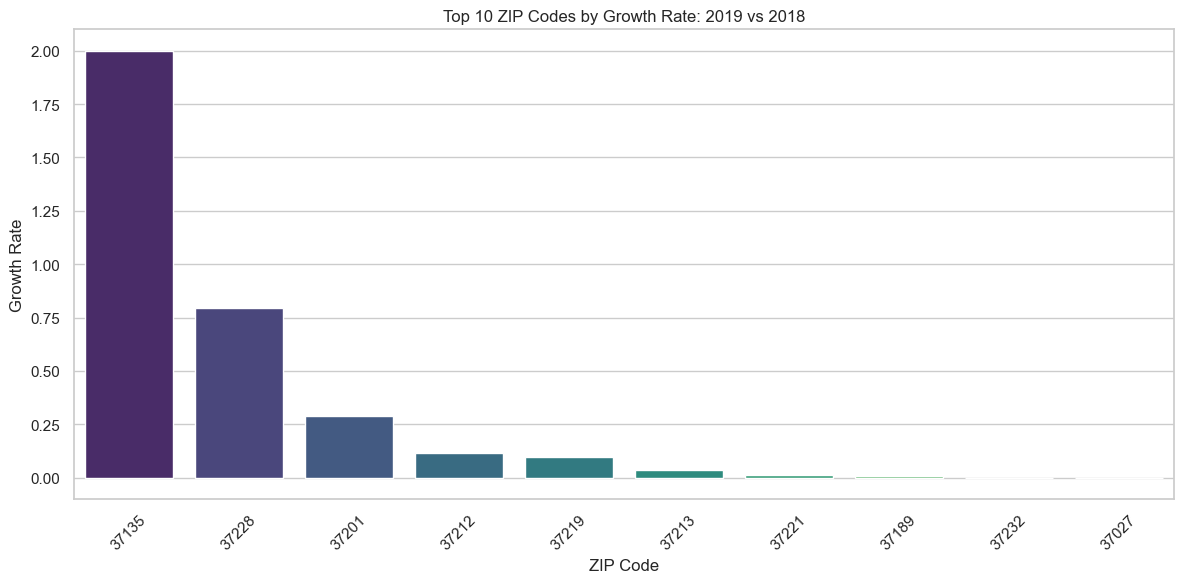

<Figure size 640x480 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("viridis", len(top_growth_2019_df))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(
    x=top_growth_2019_df.index.astype(str),
    y=top_growth_2019_df['Growth_2019_vs_2018'],
    palette=palette
)

plt.title("Top 10 ZIP Codes by Growth Rate: 2019 vs 2018")
plt.ylabel("Growth Rate")
plt.xlabel("ZIP Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig("top_growth_2019_vs_2018.png", dpi=300)

C:\Users\jingl\AppData\Local\Temp\ipykernel_48116\286878261.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


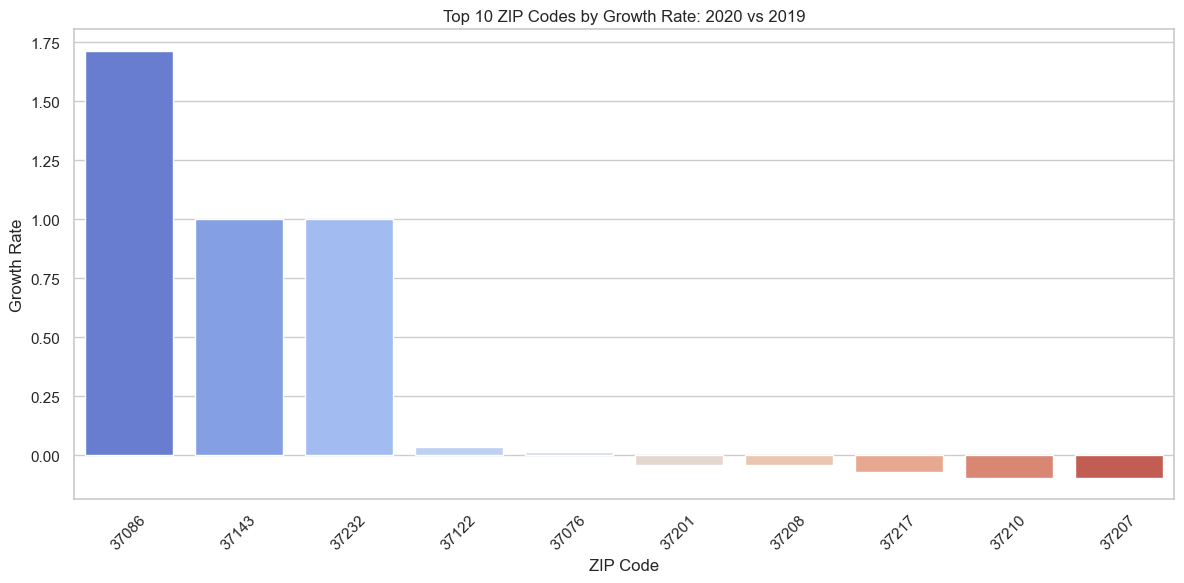

<Figure size 640x480 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

top_growth_2020_df = (
    calls_pivot[[2019, 2020, 'Growth_2020_vs_2019']]
    .sort_values(by='Growth_2020_vs_2019', ascending=False)
    .head(10)
)

top_growth_2020_df['Rank'] = top_growth_2020_df['Growth_2020_vs_2019'] \
    .rank(ascending=False, method='first').astype(int)

palette = sns.color_palette("coolwarm", len(top_growth_2020_df))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(
    x=top_growth_2020_df.index.astype(str),
    y=top_growth_2020_df["Growth_2020_vs_2019"],
    palette=palette
)

plt.title("Top 10 ZIP Codes by Growth Rate: 2020 vs 2019")
plt.ylabel("Growth Rate")
plt.xlabel("ZIP Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("top_growth_20220_vs_2019.png", dpi=300)

In [75]:
top_growth_2021_df = (
    calls_pivot[[2020, 2021, 'Growth_2021_vs_2020']]
    .sort_values(by='Growth_2021_vs_2020', ascending=False)
    .head(10)
)

In [76]:
top_growth_2021_df['Rank'] = top_growth_2021_df['Growth_2021_vs_2020'] \
    .rank(ascending=False, method='first').astype(int)

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\1319731033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


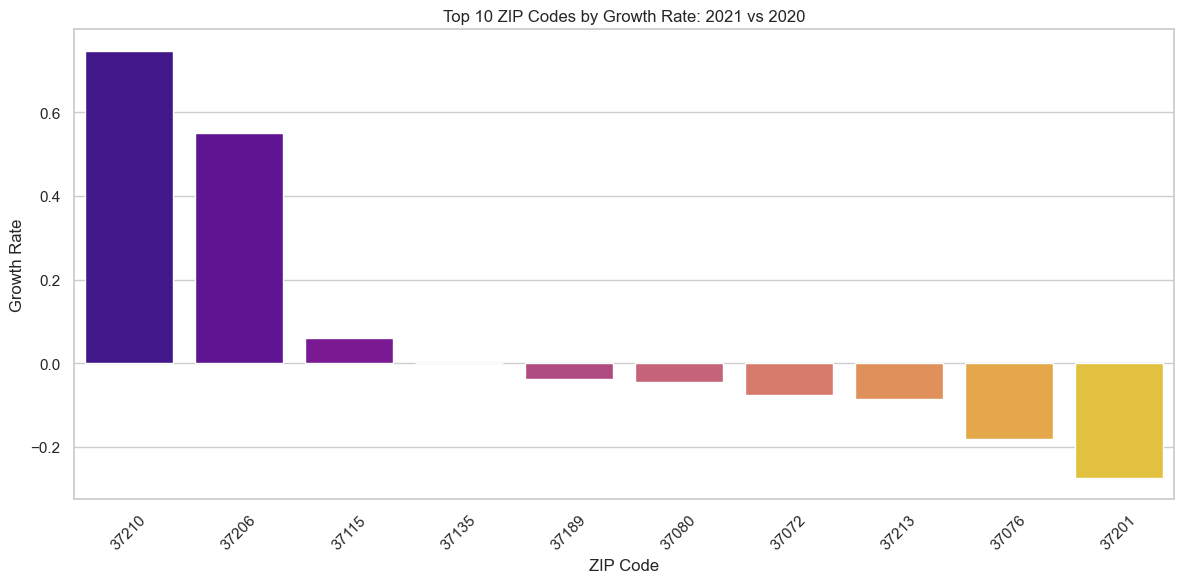

<Figure size 640x480 with 0 Axes>

In [77]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

palette = sns.color_palette("plasma", len(top_growth_2021_df))

sns.barplot(
    x=top_growth_2021_df.index.astype(str),
    y=top_growth_2021_df["Growth_2021_vs_2020"],
    palette=palette
)

plt.title("Top 10 ZIP Codes by Growth Rate: 2021 vs 2020")
plt.ylabel("Growth Rate")
plt.xlabel("ZIP Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig("top_growth_2021_vs_2020.png", dpi=300)

## Which types of calls are more likely to lead to confirmed incidents or arrests?

In [78]:
total_calls = calls_df.groupby('Tencode_Description').size().reset_index(name='Total_Calls')
total_calls.head()

,Tencode_Description,Total_Calls
0,1000,122
1,14,557
2,15,40245
3,16,2536
4,2000,3


In [79]:
# marked with'ARREST' or'CONFIRMED
confirmed_calls = calls_df[calls_df['Disposition_Description'].str.contains("ARREST|CONFIRMED|REPORT", na=False)]
confirmed_calls.head()

,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Shift,Sector,ZONE_,Latitude,Longitude,RPA,Call_Received,x,y,Year
19,20,PD201800238971,2.018021e+10,70,BURGLARY - RESIDENCE,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,...,B,NaN,NaN,NaN,NaN,NaN,2018-03-07 02:43:41,NaN,NaN,2018
24,25,PD201800003015,NaN,45,VEHICLE ACCIDENT - PROPERTY DAMAGE,P,PROGRESS,1,M.P.D. REPORT COMPLED,NaN,...,C,331,325,36.069,-86.672,8899.0,2018-01-02 05:59:21,-86.672,36.069,2018
27,28,PD201800709018,2.018062e+10,50,THEFT,RC,NaN,1,M.P.D. REPORT COMPLED,NaN,...,A,NaN,NaN,NaN,NaN,NaN,2018-07-17 16:28:23,NaN,NaN,2018
65,66,PD201800685063,2.018060e+10,70,BURGLARY - RESIDENCE,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,...,A,NaN,NaN,NaN,NaN,NaN,2018-07-10 14:08:43,NaN,NaN,2018
71,72,PD201800142266,NaN,45,VEHICLE ACCIDENT - PROPERTY DAMAGE,P,PROGRESS,1,M.P.D. REPORT COMPLED,NaN,...,C,MT,823,NaN,NaN,8609.0,2018-02-08 07:05:23,NaN,NaN,2018


In [80]:
confirmed_counts = confirmed_calls.groupby('Tencode_Description').size().reset_index(name='Confirmed_Incidents')
confirmed_counts.head()

,Tencode_Description,Confirmed_Incidents
0,1000,1
1,14,1
2,15,28
3,16,181
4,3,208


In [81]:
merged = pd.merge(total_calls, confirmed_counts, on='Tencode_Description', how='left').fillna(0)

In [82]:

merged['Confirmation_Rate'] = merged['Confirmed_Incidents'] / merged['Total_Calls']

In [83]:

merged.sort_values(by='Confirmation_Rate', ascending=False).head(10)

,Tencode_Description,Total_Calls,Confirmed_Incidents,Confirmation_Rate
15,50,38654,24640.0,0.637450
94,THEFT,119428,71295.0,0.596971
70,GANG ACTIVITY,98,45.0,0.459184
37,77,18,5.0,0.277778
85,PRISONER ESCAPEE,42,11.0,0.261905
38,79,4,1.0,0.250000
36,75,2960,726.0,0.245270
78,MISSING PERSON,11177,2538.0,0.227073
99,VEHICLE ACCIDENT - PROPERTY DAMAGE,114773,25683.0,0.223772
41,85,14,3.0,0.214286


In [84]:
tencode_map = {
    50: "THEFT",
    94: "THEFT",
    88: "THEFT",

    70: "GANG ACTIVITY",
    77: "GANG ACTIVITY",

    79: "OCCULT ACTIVITY",
    73: "OCCULT ACTIVITY",

    75: "MISSING PERSON",
    78: "MISSING PERSON",

    85: "ESCAPED PRISONER",
    42: "PRISONER ESCAPEE", 
    45: "ACCIDENT - NO INJURY",

    57: "FIGHT",
    60: "FIGHT",
    61: "FIGHT / ASSAULT", 

    66: "BOMB THREAT",
    68: "KIDNAPPING",

    93: "VEHICLE ACCIDENT - PROPERTY DAMAGE"
}

In [85]:
#  try turns Tencode_Description to number，fails if NaN
merged['Tencode_Code'] = pd.to_numeric(merged['Tencode_Description'], errors='coerce')

# map
merged['Final_Description'] = merged['Tencode_Code'].map(tencode_map).fillna(merged['Tencode_Description'])


In [86]:
summary = merged.groupby('Final_Description').agg({
    'Total_Calls': 'sum',
    'Confirmed_Incidents': 'sum'
}).reset_index()

summary['Confirmation_Rate'] = summary['Confirmed_Incidents'] / summary['Total_Calls']
summary.sort_values(by='Confirmation_Rate', ascending=False).head(10)


,Final_Description,Total_Calls,Confirmed_Incidents,Confirmation_Rate
80,THEFT,173434,95955.0,0.553265
64,MISSING PERSON,14137,3264.0,0.230883
49,ESCAPED PRISONER,14,3.0,0.214286
34,ACCIDENT - NO INJURY,30237,5886.0,0.194662
53,FIGHT / ASSAULT,26821,4824.0,0.179859
85,VEHICLE ACCIDENT - PROPERTY DAMAGE,148767,26031.0,0.174978
61,KIDNAPPING,674,112.0,0.166172
52,FIGHT,7135,1172.0,0.164261
47,DISORDERLY PERSON,115302,14041.0,0.121776
87,WANT OFFICER FOR INVESTIGATION / ASSISTA,507826,60998.0,0.120116


In [87]:
merged.to_csv("call_type_confirmation_rate.csv", index=False)

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\607184767.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


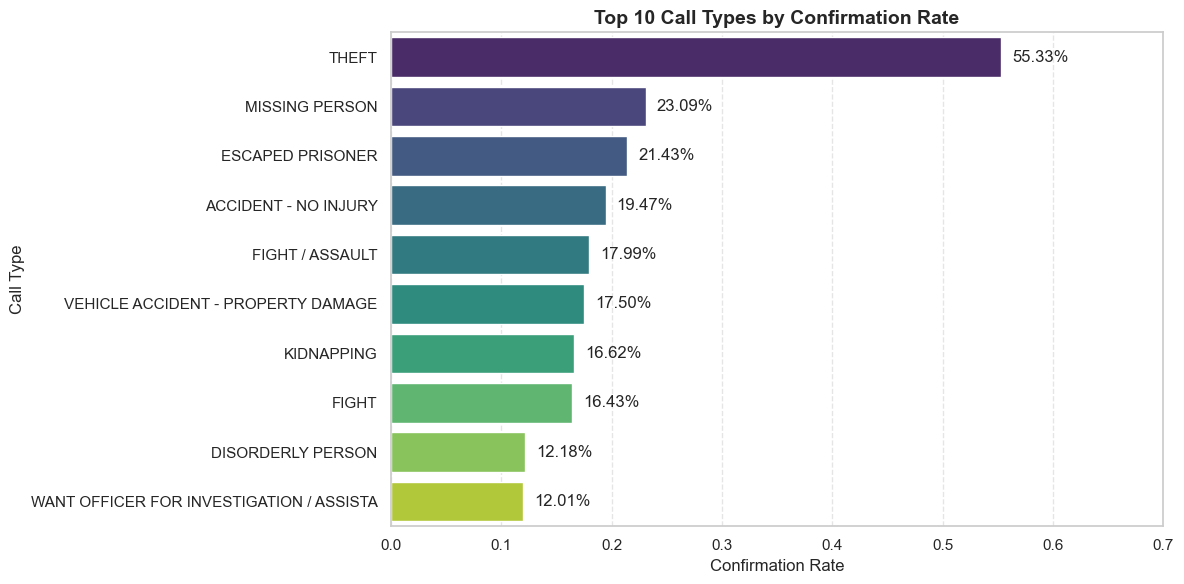

In [88]:
top10 = summary.sort_values(by='Confirmation_Rate', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x='Confirmation_Rate',
    y='Final_Description',
    palette='viridis',
    errorbar=None
)

plt.title("Top 10 Call Types by Confirmation Rate", fontsize=14, weight='bold')
plt.xlabel("Confirmation Rate")
plt.ylabel("Call Type")
plt.xlim(0, 0.7)  
plt.grid(axis='x', linestyle='--', alpha=0.5)

for index, value in enumerate(top10['Confirmation_Rate']):
    plt.text(value + 0.01, index, f"{value:.2%}", va='center')

plt.tight_layout()
plt.show()

##  Top 10 Call Types by Confirmation Rate.Theft ranks highest with a 54.2% confirmation rate.Followed by Missing Person (23.4%) and Escaped Prisoner (23.1%)

## 4. Are certain call types more frequently reported during specific shifts or in particular sectors?

In [89]:
tencode_map = {
    43: "FIGHT",
    96: "ASSISTANCE",
    50: "THEFT",
    66: "BOMB THREAT",
    70: "GANG ACTIVITY",
    75: "MISSING PERSON",
    79: "OCCULT ACTIVITY",
    85: "ESCAPED PRISONER",
    45: "ACCIDENT - NO INJURY",
    61: "KIDNAPPING"
}

In [90]:
grouped_calls = calls_df.groupby(['Tencode_Description', 'Shift']).size().reset_index(name='Call_Count')

In [91]:
top_types = grouped_calls.groupby('Tencode_Description')['Call_Count'].sum().nlargest(10).index

In [92]:
filtered_calls = grouped_calls[grouped_calls['Tencode_Description'].isin(top_types)].copy()

In [93]:
filtered_calls.loc[:, 'Tencode_Num'] = pd.to_numeric(filtered_calls['Tencode_Description'], errors='coerce')
filtered_calls.loc[:, 'Call_Type_Label'] = (
    filtered_calls['Tencode_Num'].map(tencode_map).fillna(filtered_calls['Tencode_Description'])
)

C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\3325846352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shift_a, y='Call_Type_Label', x='Call_Count', palette='Set2')


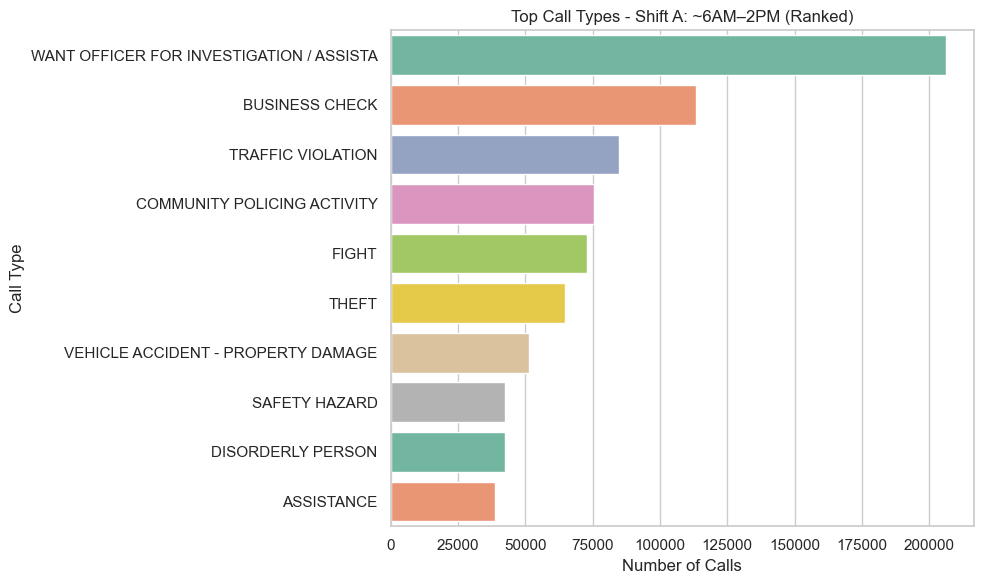

In [94]:
# Shift A: ~6AM–2PM
shift_a = filtered_calls[filtered_calls['Shift'] == 'A'].copy()
shift_a = shift_a.sort_values(by='Call_Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=shift_a, y='Call_Type_Label', x='Call_Count', palette='Set2')
plt.title('Top Call Types - Shift A: ~6AM–2PM (Ranked)')
plt.xlabel('Number of Calls')
plt.ylabel('Call Type')
plt.tight_layout()
plt.show()



C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\1912167720.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shift_b, y='Call_Type_Label', x='Call_Count', palette='Set2')


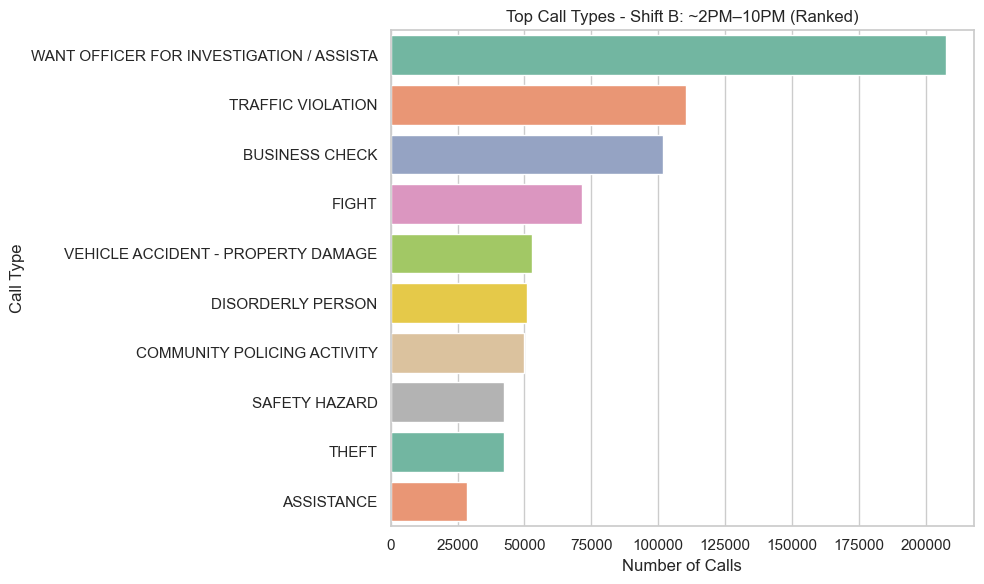

In [95]:
# Shift B: ~2PM–10PM
shift_b = filtered_calls[filtered_calls['Shift'] == 'B'].copy()
shift_b = shift_b.sort_values(by='Call_Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=shift_b, y='Call_Type_Label', x='Call_Count', palette='Set2')
plt.title('Top Call Types - Shift B: ~2PM–10PM (Ranked)')
plt.xlabel('Number of Calls')
plt.ylabel('Call Type')
plt.tight_layout()
plt.show()


C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\1827194881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shift_c, y='Call_Type_Label', x='Call_Count', palette='Set2')


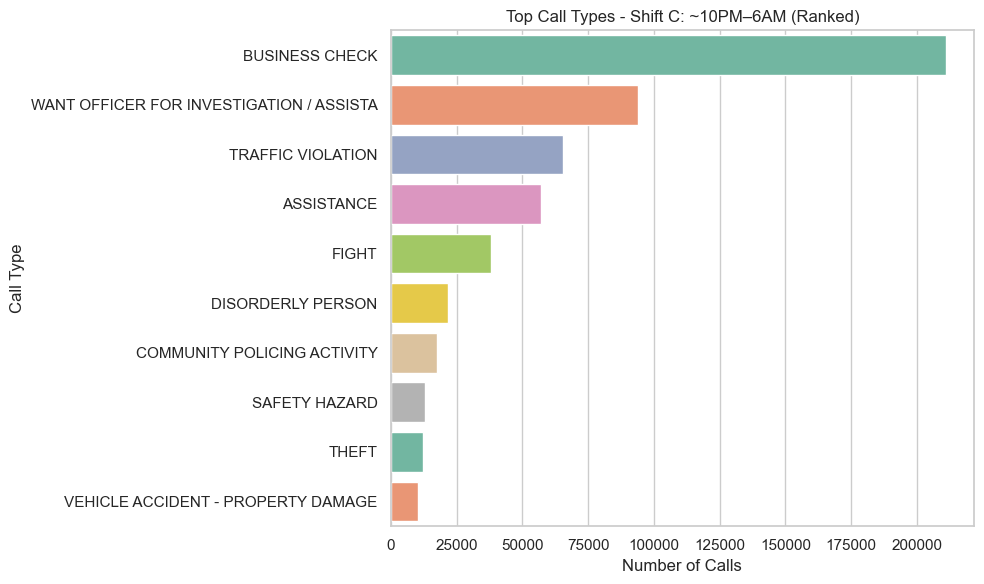

In [96]:
# Shift C: ~10PM–6AM
shift_c = filtered_calls[filtered_calls['Shift'] == 'C'].copy()
shift_c = shift_c.sort_values(by='Call_Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=shift_c, y='Call_Type_Label', x='Call_Count', palette='Set2')
plt.title('Top Call Types - Shift C: ~10PM–6AM (Ranked)')
plt.xlabel('Number of Calls')
plt.ylabel('Call Type')
plt.tight_layout()
plt.show()


In [98]:
# Group sector + call type
grouped_sector = calls_df.groupby(['Sector', 'Tencode_Description']).size().reset_index(name='Call_Count')

In [99]:
#  Top 5 call types
top_call_types = (
    grouped_sector.groupby('Tencode_Description')['Call_Count']
    .sum().nlargest(5).index
)

In [100]:
# Step Top 5 sectors
top_sectors = (
    grouped_sector.groupby('Sector')['Call_Count']
    .sum().nlargest(5).index
)

In [101]:
# Step 3: Top 5 sectors

top_sectors = (
    grouped_sector.groupby('Sector')['Call_Count']
    .sum().nlargest(5).index
)

In [102]:
filtered_sector = grouped_sector[
    grouped_sector['Tencode_Description'].isin(top_call_types) &
    grouped_sector['Sector'].isin(top_sectors)
].copy()


In [103]:
filtered_sector['Call_Type_Label'] = (
    filtered_sector['Tencode_Description']
    .astype(str)
    .replace(tencode_map)
    .fillna('OTHER')  # ← 推荐添加，避免 NaN 出现
)

In [104]:
print(filtered_sector.columns)


Index(['Sector', 'Tencode_Description', 'Call_Count', 'Call_Type_Label'], dtype='object')


In [105]:
print(filtered_sector['Call_Count'].dtype)


int64


In [106]:
print(filtered_sector['Call_Type_Label'].unique())


['43' 'BUSINESS CHECK' 'COMMUNITY POLICING ACTIVITY' 'TRAFFIC VIOLATION'
 'WANT OFFICER FOR INVESTIGATION / ASSISTA']


In [107]:
# Step 5: Map tencode to readable labels
tencode_map = {
    "43": "FIGHT",
    "96": "ASSISTANCE",
    "50": "THEFT",
    "66": "BOMB THREAT",
    "75": "GANG ACTIVITY",
    "95": "ESCAPED PRISONER",
    "45": "ACCIDENT - NO INJURY",
    "61": "KIDNAPPING",
    "90": "BUSINESS CHECK",
    "91": "TRAFFIC VIOLATION",
    "97": "WANT OFFICER FOR INVESTIGATION / ASSISTA"
}

In [108]:
sector_name_map = {
    "C": "Downtown / North Nashville",
    "E": "East / Donelson–Hermitage",
    "MT": "Midtown / Green Hills",
    "S": "South / Southeast Nashville",
    "W": "West / Bellevue"
}

In [109]:
filtered_sector['Sector_Label'] = filtered_sector['Sector'].replace(sector_name_map)


In [110]:
filtered_sector['Sector_Label'] = (
    filtered_sector['Sector'].astype(str).str.strip().replace(sector_name_map)
)


In [111]:
print(filtered_sector[['Sector', 'Sector_Label']].drop_duplicates())


     Sector                 Sector_Label
1445    C     Downtown / North Nashville
1786    E      East / Donelson–Hermitage
2569    MT         Midtown / Green Hills
3072    S    South / Southeast Nashville
3446    W                West / Bellevue


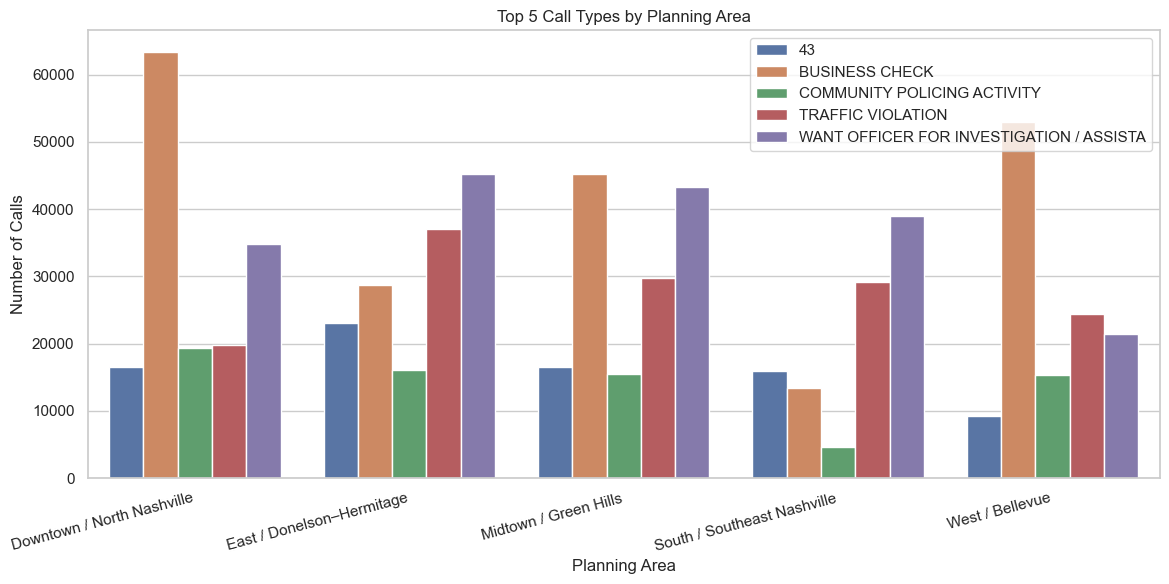

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=filtered_sector,
    x='Sector_Label',
    y='Call_Count',
    hue='Call_Type_Label'
)

plt.title("Top 5 Call Types by Planning Area")
plt.ylabel("Number of Calls")
plt.xlabel("Planning Area")
plt.legend(loc='upper right')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


In [117]:
import os
print(os.getcwd())

C:\Users\jingl\NSS Analytics DA14\Project\capstones\school capstone\Notebook


In [118]:
import geopandas as gpd
import folium
from IPython.display import IFrame

In [119]:

geojson_path = "../Police_Precinct_Boundaries_view.geojson"

In [120]:
gdf = gpd.read_file(geojson_path)

In [121]:
# 筛选目标辖区
target_precincts = ['CENTRAL', 'EAST', 'MIDTOWN HILLS', 'SOUTH', 'WEST']
sector_name_map = {
    "CENTRAL": "1. Downtown / North Nashville",
    "EAST": "2. East / Donelson-Hermitage",
    "MIDTOWN HILLS": "3. Midtown / Green Hills",
    "SOUTH": "4. South / Southeast Nashville",
    "WEST": "5. West / Bellevue"
}



In [122]:
# 过滤并添加中文标签
filtered_map = gdf[gdf['PrecinctName'].isin(target_precincts)].copy()
filtered_map['Sector_Label'] = filtered_map['PrecinctName'].replace(sector_name_map)
filtered_map = filtered_map[filtered_map['geometry'].notnull()]



In [127]:
# 自定义颜色（可以自由更换）
color_dict = {
    '1. Downtown / North Nashville': 'red',
    '2. East / Donelson-Hermitage': 'blue',
    '3. Midtown / Green Hills': 'green',
    '4. South / Southeast Nashville': 'purple',
    '5. West / Bellevue': 'orange'
}

In [128]:
# 创建地图
m = folium.Map(location=[36.1627, -86.7816], zoom_start=10)

In [129]:
# 样式函数
def style_function(feature):
    label = feature['properties'].get('Sector_Label', '')
    return {
        'fillColor': color_dict.get(label, 'gray'),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }

In [130]:
# 添加 GeoJson 图层
folium.GeoJson(
    filtered_map,
    name="Colored Precincts",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['Sector_Label'], aliases=["Planning Area"])
).add_to(m)


In [131]:
# 保存地图文件
output_filename = "nashville_precinct_colored_map_v2.html"
m.save(output_filename)

# 可视化嵌入（可选）
IFrame(output_filename, width=950, height=600)

In [132]:
# 读取 GeoJSON
gdf = gpd.read_file("../Police_Precinct_Boundaries_view.geojson")

In [133]:
# 选定前五个分区
target_precincts = ['CENTRAL', 'EAST', 'MIDTOWN HILLS', 'SOUTH', 'WEST']
sector_name_map = {
    "CENTRAL": "1. Downtown / North Nashville",
    "EAST": "2. East / Donelson-Hermitage",
    "MIDTOWN HILLS": "3. Midtown / Green Hills",
    "SOUTH": "4. South / Southeast Nashville",
    "WEST": "5. West / Bellevue"
}

In [134]:
# 筛选 + 添加标签
filtered_map = gdf[gdf['PrecinctName'].isin(target_precincts)].copy()
filtered_map['Sector_Label'] = filtered_map['PrecinctName'].replace(sector_name_map)
filtered_map = filtered_map[filtered_map['geometry'].notnull()]

In [135]:
# 颜色设置
color_dict = {
    '1. Downtown / North Nashville': 'red',
    '2. East / Donelson-Hermitage': 'blue',
    '3. Midtown / Green Hills': 'green',
    '4. South / Southeast Nashville': 'purple',
    '5. West / Bellevue': 'orange'
}

In [136]:
# 创建地图
m = folium.Map(location=[36.1627, -86.7816], zoom_start=10)

In [137]:
# 区域着色样式
def style_function(feature):
    label = feature['properties'].get('Sector_Label', '')
    return {
        'fillColor': color_dict.get(label, 'gray'),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }


In [138]:
# 添加 GeoJson 区块
folium.GeoJson(
    filtered_map,
    name="Colored Precincts",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["Sector_Label"], aliases=["Planning Area"])
).add_to(m)

In [139]:
# 添加数字编号标签（取每个区域的中心点）
for _, row in filtered_map.iterrows():
    center = row['geometry'].centroid
    number = row['Sector_Label'].split('.')[0]  # 只取编号
    folium.map.Marker(
        [center.y, center.x],
        icon=folium.DivIcon(
            html=f"""<div style="font-size:16pt; font-weight:bold; color:black">{number}</div>"""
        )
    ).add_to(m)

In [140]:
# 保存地图
m.save("nashville_precinct_colored_map_with_numbers.html")

In [141]:
from IPython.display import IFrame

# 直接显示保存的地图文件
IFrame("nashville_precinct_colored_map_with_numbers.html", width=950, height=600)


In [142]:
df = pd.read_csv("crime_incidents_cleaned_with_time.csv")
print(df.columns)
print(df[['Latitude', 'Longitude']].dropna().head())


C:\Users\jingl\AppData\Local\Temp\ipykernel_15744\3274706579.py:3: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("crime_incidents_cleaned_with_time.csv")


Index(['X', 'Y', 'OBJECTID', 'Primary_Key', 'Incident_Number', 'Report_Type',
       'Report_Type_Description', 'Incident_Status_Code',
       'Incident_Status_Description', 'Investigation_Status',
       'Incident_Location', 'Latitude', 'Longitude', 'RPA', 'Zone',
       'Location_Code', 'Location_Description', 'Offense_Number',
       'Offense_NIBRS', 'Offense_Description', 'Weapon_Description',
       'Victim_Number', 'Domestic_Related', 'Victim_Type',
       'Victim_Description', 'Victim_Gender', 'Victim_Race',
       'Victim_Ethnicity', 'Victim_County_Resident', 'Mapped_Location',
       'POINT_X', 'POINT_Y', 'ZIP_Code', 'Weapon_Primary', 'Incident_Occurred',
       'Incident_Reported', 'Year', 'Month', 'Hour', 'Weekday'],
      dtype='object')
   Latitude  Longitude
0    36.152    -86.878
1    36.051    -86.674
2    36.083    -86.614
3    36.161    -86.856
4    36.162    -86.819


In [143]:
from folium.plugins import HeatMap

m = folium.Map(location=[36.1627, -86.7816], zoom_start=11)

heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()
custom_gradient = {
    '0.2': 'blue',
    '0.4': 'lime',
    '0.6': 'yellow',
    '0.8': 'orange',
    '1.0': 'red'
}

HeatMap(
    heat_data,
    radius=8,
    blur=10,
    min_opacity=0.3,
    gradient=custom_gradient,
    max_zoom=13
).add_to(m)

m.save("nashville_crime_heatmap_strongcolor.html")

In [144]:
from IPython.display import IFrame
IFrame("nashville_crime_heatmap_strongcolor.html", width=950, height=600)

## "Shift A consistently shows higher confirmation rates for several key call types, such as THEFT and GANG ACTIVITY." "This may indicate either higher incident density during Shift A or more effective incident verification by officers working that shift." "When filtered for types with >50 calls, THEFT remains the most confirmed type across all shifts."

## How call/crime trends change over time by shift/sector?

In [161]:
calls_df.columns

Index(['OBJECTID', 'Event_Number', 'Complaint_Number', 'Tencode',
       'Tencode_Description', 'Tencode_Suffix', 'Tencode_Suffix_Description',
       'Disposition_Code', 'Disposition_Description', 'Block', 'Street_name',
       'Unit_Dispatched', 'Shift', 'Sector', 'ZONE_', 'Latitude', 'Longitude',
       'RPA', 'Call_Received', 'x', 'y', 'Year', 'Is_Confirmed',
       'Mapped_Offense'],
      dtype='object')

In [162]:
by_year_shift = calls_df.groupby(['Year', 'Shift']).size().reset_index(name='Total_Calls')

In [163]:
by_year_shift = by_year_shift[(by_year_shift['Year'] >= 2018) & (by_year_shift['Year'] <= 2021)]
by_year_shift

,Year,Shift,Total_Calls
0,2018,A,367185
1,2018,B,383034
2,2018,C,249706
3,2019,A,328470
4,2019,B,296139
5,2019,C,203624
6,2020,A,278742
7,2020,B,255132
8,2020,C,157854
9,2021,A,230159


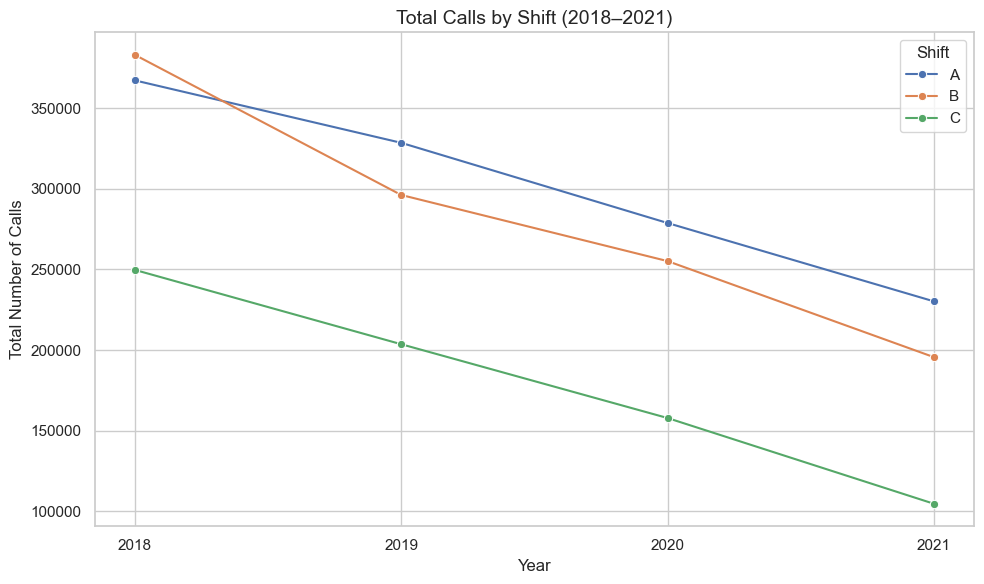

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=by_year_shift,
    x=by_year_shift['Year'].astype(str), 
    y='Total_Calls',
    hue='Shift',
    marker='o'
)

plt.title("Total Calls by Shift (2018–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Number of Calls", fontsize=12)
plt.legend(title="Shift")
plt.grid(True)
plt.tight_layout()
plt.show()


In [168]:
calls_df['Call_Received'] = pd.to_datetime(calls_df['Call_Received'], errors='coerce')

calls_df['Month'] = calls_df['Call_Received'].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

calls_df['Season'] = calls_df['Month'].apply(get_season)

In [169]:
by_season_shift = calls_df.groupby(['Season', 'Shift'])['Event_Number'].count().reset_index()
by_season_shift.rename(columns={'Event_Number': 'Total_Calls'}, inplace=True)

In [176]:
by_season_shift['Shift'] = by_season_shift['Shift'].replace({
    'A': '6AM–2PM',
    'B': '2PM–10PM',
    'C': '10PM–6AM'
})

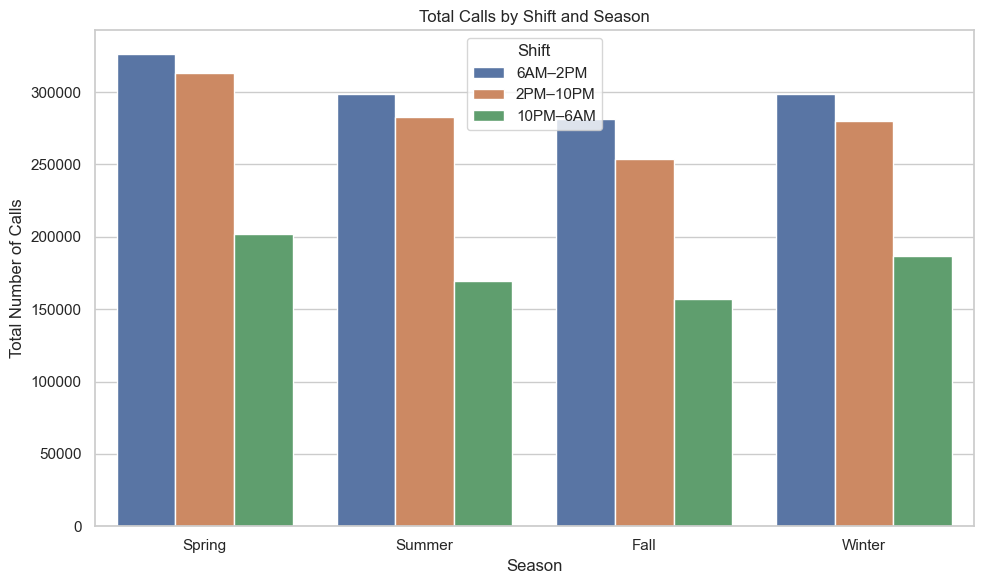

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=by_season_shift,
    x='Season',
    y='Total_Calls',
    hue='Shift',
    order=season_order
)
plt.title('Total Calls by Shift and Season')
plt.ylabel('Total Number of Calls')
plt.xlabel('Season')
plt.legend(title='Shift')
plt.tight_layout()
plt.show()


<Axes: xlabel='Season', ylabel='Total_Calls'>

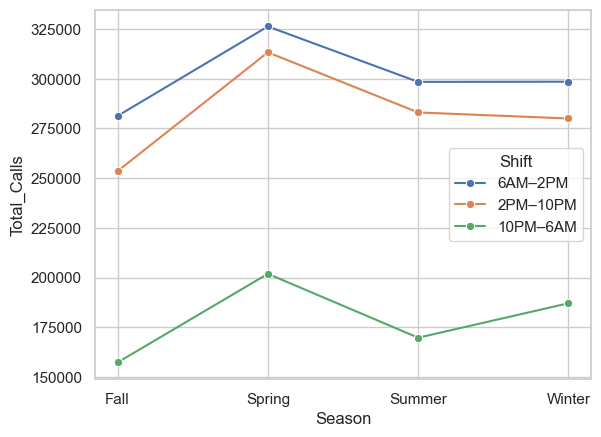

In [178]:
sns.lineplot(data=by_season_shift, x='Season', y='Total_Calls', hue='Shift', marker='o', sort=False)

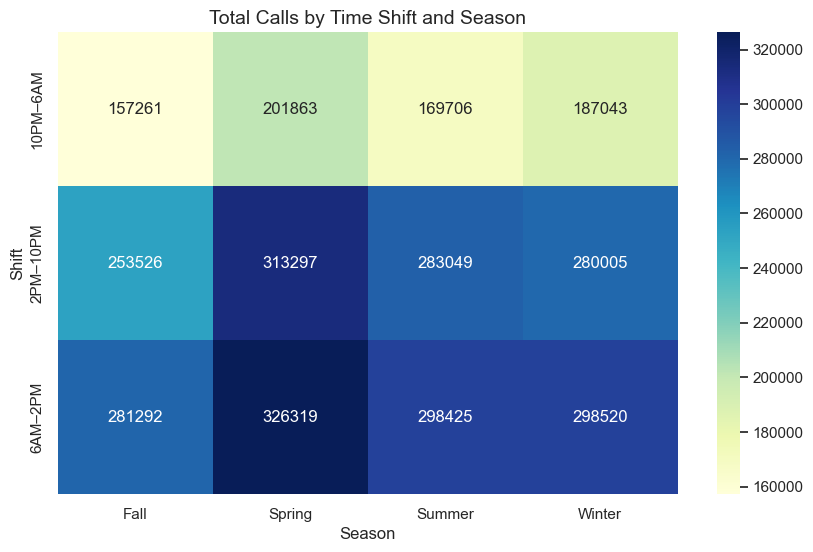

In [179]:
plt.figure(figsize=(10, 6))

pivot = by_season_shift.pivot(index='Shift', columns='Season', values='Total_Calls')

sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')

plt.title("Total Calls by Time Shift and Season", fontsize=14)

plt.show()